In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [2]:
import os
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pypinyin import lazy_pinyin
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.utils import class_weight
# Step 1: Change the working directory (update the path accordingly)
new_dir = "C:/Users/Andy/Documents/stock/"
os.chdir(new_dir)


C:\Users\Andy\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df = pd.read_csv("Trim_train/merged_cleaned_data.csv")

In [6]:
df.columns

Index(['ID', '外資券商_分點進出', '外資券商_分點成交力(%)', '外資券商_分點吃貨比(%)', '外資券商_分點出貨比(%)',
       '外資券商_前1天分點進出', '外資券商_前1天分點成交力(%)', '外資券商_前1天分點吃貨比(%)',
       '外資券商_前1天分點出貨比(%)', '外資券商_前2天分點進出',
       ...
       '上市加權指數前15天成交量', '上市加權指數前16天成交量', '上市加權指數前17天成交量', '上市加權指數前18天成交量',
       '上市加權指數前19天成交量', '上市加權指數前20天成交量', '上市加權指數5天成交量波動度', '上市加權指數10天成交量波動度',
       '上市加權指數20天成交量波動度', '飆股'],
      dtype='object', length=673)

In [7]:
from pypinyin import lazy_pinyin
df.columns = [lazy_pinyin(col)[0] for col in df.columns]

In [8]:
target_column = "biao" 

In [9]:
X = df.drop(columns=[target_column, "ID"], errors="ignore")
y = df[target_column]

In [10]:
X.columns = [f"{col}_{i}" if X.columns.duplicated()[i] else col for i, col in enumerate(X.columns)]

In [11]:
X = X.fillna(X.mean())

In [87]:
X.columns

AttributeError: 'numpy.float64' object has no attribute 'columns'

In [12]:
# Calculate IQR for all numerical features
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define outliers: Any value outside 1.5 * IQR bounds
outlier_mask = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Create an "outlier count" column (number of outlier features per row)
X["outlier_count"] = outlier_mask.sum(axis=1)

# Optional: Convert to binary flag (1 if any outlier, 0 if none)
X["is_outlier"] = (X["outlier_count"] > 0).astype(int)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X["outlier_count_scaled"] = scaler.fit_transform(X[["outlier_count"]])

In [13]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
arguments = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "num_leaves": 20,
    "learning_rate": 0.01034,
    "n_estimators": 30000,
    "max_bin": 113,
    "subsample": 0.7708753433144212,
    "subsample_freq": 5,
    "colsample_bytree": 0.6628,
    "feature_fraction_seed": 42,
    "bagging_seed": 42,
    "min_child_samples": 25
}

In [15]:
BestHyperparameters = {'boosting_type': 'dart', 
                        'num_leaves': 10, 
                        'learning_rate': 0.004889109596845264, 
                        'n_estimators': 16943, 'max_bin': 232, 
                        'subsample': 0.7823086040575833, 'subsample_freq': 13, 
                        'colsample_bytree': 0.8106243879716812, 
                        'min_child_samples': 5}

In [16]:
Best_Hyperparameters_2 = {'num_leaves': 30, 
                       "boosting_type": "gbdt",
                        'learning_rate': 0.04775679749328264, 
                       'n_estimators': 14029, 
                       'max_bin': 111, 
                       'subsample': 0.9773059458207831, 
                       'subsample_freq': 1, 
                       'colsample_bytree': 0.9523986724033833, 
                       'min_child_samples': 30}

In [17]:
Best_Hyperparameters_3 = {'num_leaves': 45, 'learning_rate': 0.010556170455516557, 
                          'n_estimators': 44226, 'max_bin': 162,
                          'subsample': 0.8812363685123362, 'subsample_freq': 2,
                          'colsample_bytree': 0.545954397887439, 'min_child_samples': 31}

In [18]:
Best_Hyperparameters_4 = {'num_leaves': 22, 'learning_rate': 0.004959565521909212, 
                          'n_estimators': 50440, 'max_bin': 175, 'subsample': 0.8403726099791593, 
                          'subsample_freq': 1, 'colsample_bytree': 0.5102871613901921, 'min_child_samples': 5}

In [19]:
catboost_params = {
    'class_weights' : class_weights,
    'learning_rate': 0.004775,
    'iterations': 134029,
    'depth': 6,  # You can tune this (since there's no num_leaves)
    'border_count': 111,
    'subsample': 0.6773059458207831,
    'min_data_in_leaf': 30,
    'loss_function': 'Logloss',
    'eval_metric': 'F1',
    'verbose': 100,
    'random_seed': 42
}

NameError: name 'class_weights' is not defined

In [390]:
X_train.shape

(160691, 674)

In [20]:
# Count missing values per column
missing_values = X.isna().sum()

# Print only columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


In [179]:
bigModel = lgb.LGBMClassifier(**arguments)
bigModel.fit(X_train, y_train)

# Step 6: Predict and Evaluate Accuracy
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability for class 1

In [ ]:
bigModel = lgb.LGBMClassifier(**Best_Hyperparameters_4)
bigModel.fit(X_train, y_train)

# Step 6: Predict and Evaluate Accuracy
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability for class 1

In [38]:
bigModel = lgb.LGBMClassifier(class_weight='balanced',**Best_Hyperparameters_3)
bigModel.fit(X_train, y_train)

# Step 6: Predict and Evaluate Accuracy
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability for class 1

In [42]:
weights = class_weight.compute_class_weight(class_weight='balanced',
                                            classes=np.unique(y_train),
                                            y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

In [259]:
catmodel = CatBoostClassifier(**catboost_params)
catmodel.fit(X_train, y_train)


0:	learn: 0.9016541	total: 133ms	remaining: 4h 56m 37s
100:	learn: 0.9260767	total: 8.89s	remaining: 3h 16m 35s
200:	learn: 0.9334129	total: 17.7s	remaining: 3h 16m 28s
300:	learn: 0.9383299	total: 26.5s	remaining: 3h 16m 28s
400:	learn: 0.9445224	total: 35.4s	remaining: 3h 16m 40s
500:	learn: 0.9503980	total: 44.3s	remaining: 3h 16m 55s
600:	learn: 0.9540889	total: 53.2s	remaining: 3h 17m
700:	learn: 0.9564629	total: 1m 2s	remaining: 3h 17m 27s
800:	learn: 0.9589034	total: 1m 11s	remaining: 3h 17m 1s
900:	learn: 0.9617185	total: 1m 19s	remaining: 3h 16m 58s
1000:	learn: 0.9638073	total: 1m 30s	remaining: 3h 20m 20s
1100:	learn: 0.9660979	total: 1m 39s	remaining: 3h 20m 50s
1200:	learn: 0.9674824	total: 1m 48s	remaining: 3h 20m 22s
1300:	learn: 0.9684995	total: 1m 57s	remaining: 3h 20m 4s
1400:	learn: 0.9699142	total: 2m 6s	remaining: 3h 19m 40s
1500:	learn: 0.9709355	total: 2m 15s	remaining: 3h 19m 5s
1600:	learn: 0.9717666	total: 2m 24s	remaining: 3h 18m 59s
1700:	learn: 0.9725220	to

14000:	learn: 0.9998966	total: 20m 19s	remaining: 2h 54m 14s
14100:	learn: 0.9999028	total: 20m 29s	remaining: 2h 54m 16s
14200:	learn: 0.9999028	total: 20m 37s	remaining: 2h 54m 5s
14300:	learn: 0.9999028	total: 20m 45s	remaining: 2h 53m 48s
14400:	learn: 0.9999028	total: 20m 53s	remaining: 2h 53m 32s
14500:	learn: 0.9999060	total: 21m	remaining: 2h 53m 13s
14600:	learn: 0.9999060	total: 21m 8s	remaining: 2h 52m 55s
14700:	learn: 0.9999091	total: 21m 16s	remaining: 2h 52m 37s
14800:	learn: 0.9999122	total: 21m 23s	remaining: 2h 52m 21s
14900:	learn: 0.9999216	total: 21m 33s	remaining: 2h 52m 17s
15000:	learn: 0.9999310	total: 21m 41s	remaining: 2h 52m 6s
15100:	learn: 0.9999310	total: 21m 49s	remaining: 2h 51m 50s
15200:	learn: 0.9999373	total: 21m 57s	remaining: 2h 51m 36s
15300:	learn: 0.9999373	total: 22m 4s	remaining: 2h 51m 20s
15400:	learn: 0.9999373	total: 22m 13s	remaining: 2h 51m 11s
15500:	learn: 0.9999373	total: 22m 22s	remaining: 2h 51m 4s
15600:	learn: 0.9999373	total: 22

27600:	learn: 0.9999812	total: 38m 1s	remaining: 2h 26m 38s
27700:	learn: 0.9999812	total: 38m 9s	remaining: 2h 26m 27s
27800:	learn: 0.9999812	total: 38m 16s	remaining: 2h 26m 16s
27900:	learn: 0.9999812	total: 38m 25s	remaining: 2h 26m 9s
28000:	learn: 0.9999812	total: 38m 33s	remaining: 2h 26m
28100:	learn: 0.9999812	total: 38m 41s	remaining: 2h 25m 49s
28200:	learn: 0.9999812	total: 38m 48s	remaining: 2h 25m 39s
28300:	learn: 0.9999875	total: 38m 56s	remaining: 2h 25m 27s
28400:	learn: 0.9999875	total: 39m 3s	remaining: 2h 25m 16s
28500:	learn: 0.9999875	total: 39m 11s	remaining: 2h 25m 5s
28600:	learn: 0.9999875	total: 39m 18s	remaining: 2h 24m 54s
28700:	learn: 0.9999875	total: 39m 26s	remaining: 2h 24m 45s
28800:	learn: 0.9999875	total: 39m 35s	remaining: 2h 24m 39s
28900:	learn: 0.9999875	total: 39m 43s	remaining: 2h 24m 29s
29000:	learn: 0.9999875	total: 39m 51s	remaining: 2h 24m 19s
29100:	learn: 0.9999875	total: 39m 58s	remaining: 2h 24m 9s
29200:	learn: 0.9999875	total: 40m

41200:	learn: 0.9999906	total: 55m 36s	remaining: 2h 5m 16s
41300:	learn: 0.9999906	total: 55m 43s	remaining: 2h 5m 7s
41400:	learn: 0.9999906	total: 55m 51s	remaining: 2h 4m 57s
41500:	learn: 0.9999906	total: 55m 58s	remaining: 2h 4m 48s
41600:	learn: 0.9999906	total: 56m 6s	remaining: 2h 4m 38s
41700:	learn: 0.9999906	total: 56m 13s	remaining: 2h 4m 29s
41800:	learn: 0.9999906	total: 56m 22s	remaining: 2h 4m 22s
41900:	learn: 0.9999906	total: 56m 30s	remaining: 2h 4m 13s
42000:	learn: 0.9999906	total: 56m 37s	remaining: 2h 4m 3s
42100:	learn: 0.9999906	total: 56m 44s	remaining: 2h 3m 54s
42200:	learn: 0.9999906	total: 56m 52s	remaining: 2h 3m 44s
42300:	learn: 0.9999906	total: 56m 59s	remaining: 2h 3m 34s
42400:	learn: 0.9999906	total: 57m 6s	remaining: 2h 3m 25s
42500:	learn: 0.9999906	total: 57m 14s	remaining: 2h 3m 16s
42600:	learn: 0.9999906	total: 57m 21s	remaining: 2h 3m 7s
42700:	learn: 0.9999906	total: 57m 30s	remaining: 2h 3m
42800:	learn: 0.9999906	total: 57m 38s	remaining:

54500:	learn: 0.9999937	total: 1h 13m 17s	remaining: 1h 46m 56s
54600:	learn: 0.9999937	total: 1h 13m 24s	remaining: 1h 46m 47s
54700:	learn: 0.9999937	total: 1h 13m 32s	remaining: 1h 46m 39s
54800:	learn: 0.9999937	total: 1h 13m 40s	remaining: 1h 46m 30s
54900:	learn: 0.9999937	total: 1h 13m 47s	remaining: 1h 46m 21s
55000:	learn: 0.9999937	total: 1h 13m 55s	remaining: 1h 46m 13s
55100:	learn: 0.9999937	total: 1h 14m 3s	remaining: 1h 46m 4s
55200:	learn: 0.9999937	total: 1h 14m 11s	remaining: 1h 45m 56s
55300:	learn: 0.9999937	total: 1h 14m 19s	remaining: 1h 45m 49s
55400:	learn: 0.9999937	total: 1h 14m 28s	remaining: 1h 45m 41s
55500:	learn: 0.9999937	total: 1h 14m 35s	remaining: 1h 45m 32s
55600:	learn: 0.9999937	total: 1h 14m 43s	remaining: 1h 45m 24s
55700:	learn: 0.9999937	total: 1h 14m 51s	remaining: 1h 45m 15s
55800:	learn: 0.9999937	total: 1h 14m 58s	remaining: 1h 45m 6s
55900:	learn: 0.9999937	total: 1h 15m 6s	remaining: 1h 44m 58s
56000:	learn: 0.9999937	total: 1h 15m 14s	re

67400:	learn: 0.9999937	total: 1h 30m 8s	remaining: 1h 29m 6s
67500:	learn: 0.9999937	total: 1h 30m 16s	remaining: 1h 28m 58s
67600:	learn: 0.9999937	total: 1h 30m 25s	remaining: 1h 28m 51s
67700:	learn: 0.9999937	total: 1h 30m 33s	remaining: 1h 28m 43s
67800:	learn: 0.9999937	total: 1h 30m 41s	remaining: 1h 28m 34s
67900:	learn: 0.9999937	total: 1h 30m 49s	remaining: 1h 28m 26s
68000:	learn: 0.9999937	total: 1h 30m 56s	remaining: 1h 28m 18s
68100:	learn: 0.9999937	total: 1h 31m 5s	remaining: 1h 28m 10s
68200:	learn: 0.9999937	total: 1h 31m 13s	remaining: 1h 28m 3s
68300:	learn: 0.9999937	total: 1h 31m 21s	remaining: 1h 27m 55s
68400:	learn: 0.9999937	total: 1h 31m 29s	remaining: 1h 27m 46s
68500:	learn: 0.9999937	total: 1h 31m 37s	remaining: 1h 27m 38s
68600:	learn: 0.9999937	total: 1h 31m 45s	remaining: 1h 27m 30s
68700:	learn: 0.9999937	total: 1h 31m 53s	remaining: 1h 27m 22s
68800:	learn: 0.9999937	total: 1h 32m	remaining: 1h 27m 14s
68900:	learn: 0.9999937	total: 1h 32m 8s	remaini

80400:	learn: 0.9999937	total: 1h 47m 11s	remaining: 1h 11m 29s
80500:	learn: 0.9999937	total: 1h 47m 18s	remaining: 1h 11m 21s
80600:	learn: 0.9999937	total: 1h 47m 26s	remaining: 1h 11m 13s
80700:	learn: 0.9999937	total: 1h 47m 34s	remaining: 1h 11m 4s
80800:	learn: 0.9999937	total: 1h 47m 41s	remaining: 1h 10m 56s
80900:	learn: 0.9999937	total: 1h 47m 49s	remaining: 1h 10m 48s
81000:	learn: 0.9999937	total: 1h 47m 57s	remaining: 1h 10m 40s
81100:	learn: 0.9999937	total: 1h 48m 4s	remaining: 1h 10m 32s
81200:	learn: 0.9999937	total: 1h 48m 12s	remaining: 1h 10m 24s
81300:	learn: 0.9999937	total: 1h 48m 21s	remaining: 1h 10m 16s
81400:	learn: 0.9999937	total: 1h 48m 29s	remaining: 1h 10m 8s
81500:	learn: 0.9999937	total: 1h 48m 37s	remaining: 1h 10m
81600:	learn: 0.9999937	total: 1h 48m 45s	remaining: 1h 9m 52s
81700:	learn: 0.9999937	total: 1h 48m 52s	remaining: 1h 9m 44s
81800:	learn: 0.9999937	total: 1h 49m	remaining: 1h 9m 36s
81900:	learn: 0.9999937	total: 1h 49m 8s	remaining: 1h

93800:	learn: 0.9999937	total: 2h 4m 35s	remaining: 53m 26s
93900:	learn: 0.9999937	total: 2h 4m 43s	remaining: 53m 18s
94000:	learn: 0.9999937	total: 2h 4m 51s	remaining: 53m 9s
94100:	learn: 0.9999937	total: 2h 4m 58s	remaining: 53m 1s
94200:	learn: 0.9999937	total: 2h 5m 6s	remaining: 52m 53s
94300:	learn: 0.9999937	total: 2h 5m 13s	remaining: 52m 45s
94400:	learn: 0.9999937	total: 2h 5m 21s	remaining: 52m 37s
94500:	learn: 0.9999937	total: 2h 5m 29s	remaining: 52m 29s
94600:	learn: 0.9999937	total: 2h 5m 36s	remaining: 52m 21s
94700:	learn: 0.9999937	total: 2h 5m 44s	remaining: 52m 13s
94800:	learn: 0.9999937	total: 2h 5m 52s	remaining: 52m 5s
94900:	learn: 0.9999937	total: 2h 5m 59s	remaining: 51m 56s
95000:	learn: 0.9999937	total: 2h 6m 7s	remaining: 51m 48s
95100:	learn: 0.9999937	total: 2h 6m 15s	remaining: 51m 41s
95200:	learn: 0.9999937	total: 2h 6m 24s	remaining: 51m 33s
95300:	learn: 0.9999937	total: 2h 6m 31s	remaining: 51m 25s
95400:	learn: 0.9999937	total: 2h 6m 39s	rema

107300:	learn: 0.9999937	total: 2h 22m 17s	remaining: 35m 26s
107400:	learn: 0.9999937	total: 2h 22m 25s	remaining: 35m 18s
107500:	learn: 0.9999937	total: 2h 22m 33s	remaining: 35m 10s
107600:	learn: 0.9999937	total: 2h 22m 40s	remaining: 35m 2s
107700:	learn: 0.9999937	total: 2h 22m 48s	remaining: 34m 54s
107800:	learn: 0.9999937	total: 2h 22m 56s	remaining: 34m 46s
107900:	learn: 0.9999937	total: 2h 23m 3s	remaining: 34m 38s
108000:	learn: 0.9999937	total: 2h 23m 12s	remaining: 34m 30s
108100:	learn: 0.9999937	total: 2h 23m 20s	remaining: 34m 22s
108200:	learn: 0.9999937	total: 2h 23m 28s	remaining: 34m 14s
108300:	learn: 0.9999937	total: 2h 23m 36s	remaining: 34m 6s
108400:	learn: 0.9999937	total: 2h 23m 43s	remaining: 33m 58s
108500:	learn: 0.9999937	total: 2h 23m 51s	remaining: 33m 50s
108600:	learn: 0.9999937	total: 2h 23m 59s	remaining: 33m 42s
108700:	learn: 0.9999937	total: 2h 24m 6s	remaining: 33m 34s
108800:	learn: 0.9999937	total: 2h 24m 14s	remaining: 33m 26s
108900:	lear

120600:	learn: 0.9999937	total: 2h 39m 44s	remaining: 17m 47s
120700:	learn: 0.9999937	total: 2h 39m 52s	remaining: 17m 39s
120800:	learn: 0.9999937	total: 2h 40m	remaining: 17m 31s
120900:	learn: 0.9999937	total: 2h 40m 8s	remaining: 17m 23s
121000:	learn: 0.9999937	total: 2h 40m 17s	remaining: 17m 15s
121100:	learn: 0.9999937	total: 2h 40m 24s	remaining: 17m 7s
121200:	learn: 0.9999937	total: 2h 40m 32s	remaining: 16m 59s
121300:	learn: 0.9999937	total: 2h 40m 40s	remaining: 16m 51s
121400:	learn: 0.9999937	total: 2h 40m 48s	remaining: 16m 43s
121500:	learn: 0.9999937	total: 2h 40m 56s	remaining: 16m 35s
121600:	learn: 0.9999937	total: 2h 41m 4s	remaining: 16m 27s
121700:	learn: 0.9999937	total: 2h 41m 11s	remaining: 16m 19s
121800:	learn: 0.9999937	total: 2h 41m 19s	remaining: 16m 11s
121900:	learn: 0.9999937	total: 2h 41m 26s	remaining: 16m 3s
122000:	learn: 0.9999937	total: 2h 41m 34s	remaining: 15m 55s
122100:	learn: 0.9999937	total: 2h 41m 42s	remaining: 15m 47s
122200:	learn: 0

134028:	learn: 0.9999937	total: 2h 58m 28s	remaining: 0us


In [260]:
y_pred_cat = catmodel.predict(X_test)

In [166]:
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability for class 1

In [22]:
bigModel_2 = lgb.LGBMClassifier(class_weight="balanced",**arguments)
bigModel_2.fit(X_train, y_train)


In [261]:
# Cat model
precision = precision_score(y_test, y_pred_cat)
recall = recall_score(y_test, y_pred_cat)
f1 = f1_score(y_test, y_pred_cat)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.704225
Recall: 0.680272
F1 Score: 0.6920


In [169]:
y_pred = (y_pred_proba >= 0.1).astype(int) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.993902
Recall: 0.554422
F1 Score: 0.7118


In [173]:
# including outlier index
y_pred = (y_pred_proba >= 0.004).astype(int) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.930233
Recall: 0.680272
F1 Score: 0.7859


## Feature importance

In [59]:
X_train.columns = X_train.columns.astype(str)
X_test.columns =X_test.columns.astype(str)

# Rename duplicate columns by adding a suffix (_1, _2, etc.)
X_train.columns = pd.Series(X_train.columns).astype(str) + "_" + pd.Series(X_train.columns).groupby(X_train.columns).cumcount().astype(str)
X_test.columns = pd.Series(X_test.columns).astype(str) + "_" + pd.Series(X_test.columns).groupby(X_test.columns).cumcount().astype(str)


In [226]:
feature_importance = pd.DataFrame({"feature": X_train.columns, "importance": bigModel.feature_importances_})
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# Keep only top 200 most important features
top_features = feature_importance.head(70)["feature"].tolist()

In [175]:
top_features

['shang_669_0',
 'shang_637_0',
 'shang_649_0',
 'shang_647_0',
 'ji_384_0',
 'shang_644_0',
 'shang_668_0',
 'shang_664_0',
 'shang_660_0',
 'shang_646_0',
 'shang_651_0',
 'shang_640_0',
 'shang_639_0',
 'shang_643_0',
 'shang_650_0',
 'shang_670_0',
 'shang_652_0',
 'ji_375_0',
 'shang_663_0',
 'shang_666_0',
 'shang_641_0',
 'ji_371_0',
 'shang_654_0',
 'shang_638_0',
 'ji_408_0',
 'shang_656_0',
 'shang_659_0',
 'shang_657_0',
 'ji_0',
 'shang_642_0',
 'shang_665_0',
 'ji_391_0',
 'shang_653_0',
 'shang_662_0',
 'ji_377_0',
 'shang_648_0',
 'shang_667_0',
 'shang_645_0',
 'shang_661_0',
 'ji_392_0',
 'shang_655_0',
 'ji_358_0',
 'ji_374_0',
 'ji_376_0',
 'ji_420_0',
 'shang_624_0',
 'shang_658_0',
 'ji_389_0',
 'ji_540_0',
 'ji_369_0',
 'ji_372_0',
 'ji_553_0',
 'ji_541_0',
 'ji_424_0',
 'wai_66_0',
 'ri_322_0',
 'ge_271_0',
 'ji_545_0',
 'ji_416_0',
 'ji_406_0',
 'ji_407_0',
 'ji_353_0',
 'ji_396_0',
 'ge_259_0',
 'ge_308_0',
 'shang_630_0',
 'shang_620_0',
 'ji_428_0',
 'ge_589_

In [176]:
feature_importance[feature_importance['feature']=="outlier_count"]

,feature,importance


In [227]:
X_train_trimmed = X_train[top_features]
X_test_trimmed = X_test[top_features]

In [296]:
X_test.shape

(40173, 674)

In [228]:
X_train_trimmed.shape

(160691, 70)

### Rerun again

In [229]:
bigModel_trimmed = lgb.LGBMClassifier(**Best_Hyperparameters_4)
bigModel_trimmed.fit(X_train_trimmed, y_train)

LGBMClassifier(colsample_bytree=0.5102871613901921,
               learning_rate=0.004959565521909212, max_bin=175,
               min_child_samples=5, n_estimators=50440, num_leaves=22,
               subsample=0.8403726099791593, subsample_freq=1)

In [230]:
y_pred_proba_trimmed = bigModel_trimmed.predict_proba(X_test_trimmed)[:, 1]  # Get probability for class 1

In [236]:
# Step 6: Predict and Evaluate Accuracy

y_pred2 = (y_pred_proba_trimmed >= 0.005).astype(int)  # Convert probabilities to 0/1

In [237]:
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.956140
Recall: 0.741497
F1 Score: 0.8352


In [119]:
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.944954
Recall: 0.700680
F1 Score: 0.8047


In [169]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

C:\Users\Andy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


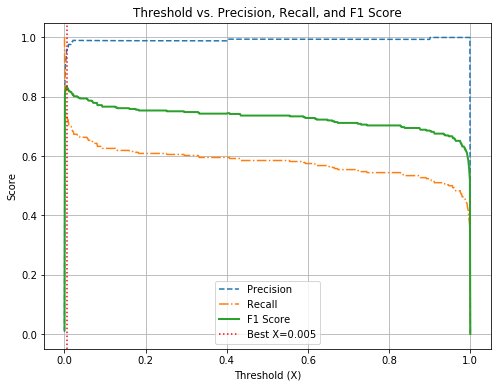

Best Threshold (X) for max F1: 0.005, F1 Score: 0.8352


In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the range of threshold values
thresholds = np.linspace(0, 1, 1000)  # 100 values between 0 and 1

# Store precision, recall, and F1 scores for each threshold
precision_scores = []
recall_scores = []
f1_scores = []

# Compute metrics for each threshold
for X in thresholds:
    y_pred2 = (y_pred_proba_trimmed >= X).astype(int)
    precision = precision_score(y_test, y_pred2)
    recall = recall_score(y_test, y_pred2)
    f1 = f1_score(y_test, y_pred2)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_scores, label="Precision", linestyle="--")
plt.plot(thresholds, recall_scores, label="Recall", linestyle="-.")
plt.plot(thresholds, f1_scores, label="F1 Score", linewidth=2)
plt.xlabel("Threshold (X)")
plt.ylabel("Score")
plt.title("Threshold vs. Precision, Recall, and F1 Score")
plt.legend()
plt.grid()

# Find the threshold that gives the maximum F1 score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

plt.axvline(best_threshold, color="red", linestyle=":", label=f"Best X={best_threshold:.3f}")
plt.legend()

# Show the plot
plt.show()

# Print the best threshold and corresponding F1 score
print(f"Best Threshold (X) for max F1: {best_threshold:.3f}, F1 Score: {best_f1:.4f}")


### Investigation

In [262]:

# Assume X_test is a DataFrame
analysis_df = X_test_trimmed.copy()
analysis_df['y_true'] = y_test.values
analysis_df['y_pred'] = y_pred2
analysis_df['y_proba'] = y_pred_proba_trimmed

In [263]:
# False Negatives: actual 1 but predicted 0
false_negatives = analysis_df[(analysis_df['y_true'] == 1) & (analysis_df['y_pred'] == 0)]

# False Positives: actual 0 but predicted 1
false_positives = analysis_df[(analysis_df['y_true'] == 0) & (analysis_df['y_pred'] == 1)]

# True Positives: actual 1 and predicted 1
true_positives = analysis_df[(analysis_df['y_true'] == 1) & (analysis_df['y_pred'] == 1)]

# True Negatives: actual 0 and predicted 0
true_negatives = analysis_df[(analysis_df['y_true'] == 0) & (analysis_df['y_pred'] == 0)]

In [267]:
total = len(y_test)
summary_counts = {
    'True Positives (TP)': ((y_test == 1) & (y_pred == 1)).sum(),
    'True Negatives (TN)': ((y_test == 0) & (y_pred == 0)).sum(),
    'False Positives (FP)': ((y_test == 0) & (y_pred == 1)).sum(),
    'False Negatives (FN)': ((y_test == 1) & (y_pred == 0)).sum()
}
# Create DataFrame
summary_df = pd.DataFrame([
    {'Prediction Category': k, 
     'Count': v, 
     'Ratio': v / total} 
    for k, v in summary_counts.items()
])

summary_counts

{'True Positives (TP)': 174,
 'True Negatives (TN)': 39836,
 'False Positives (FP)': 43,
 'False Negatives (FN)': 120}

In [269]:
174/(174+120)

0.5918367346938775

In [274]:
analysis_df = X_test.copy()
analysis_df['y_true'] = y_test.values
analysis_df['y_pred'] = y_pred

# Define prediction groups
def assign_group(row):
    if row['y_true'] == 1 and row['y_pred'] == 1:
        return 'True Positive'
    elif row['y_true'] == 0 and row['y_pred'] == 0:
        return 'True Negative'
    elif row['y_true'] == 1 and row['y_pred'] == 0:
        return 'False Negative'
    elif row['y_true'] == 0 and row['y_pred'] == 1:
        return 'False Positive'

analysis_df['group'] = analysis_df.apply(assign_group, axis=1)

In [275]:
# Drop label columns for comparison
feature_summary = analysis_df.drop(columns=['y_true', 'y_pred']).groupby('group').mean().T

# (Optional) Add std for better comparison
feature_std = analysis_df.drop(columns=['y_true', 'y_pred']).groupby('group').std().T

# Display feature_summary with round values
feature_summary_rounded = feature_summary.round(3)

import pandas as pd
pd.set_option("display.max_rows", None)  # to view all rows if needed
display(feature_summary_rounded)

group,False Negative,False Positive,True Negative,True Positive
wai_0,1.114,1.306,1.215,1.350
wai_1_0,1.359,1.482,1.223,1.358
wai_2_0,1.227,1.442,1.228,1.180
wai_3_0,1.087,1.171,1.227,1.043
wai_4_0,1.427,1.566,1.213,1.304
wai_5_0,1.238,1.253,1.225,1.244
wai_6_0,1.253,1.460,1.223,1.218
wai_7_0,1.064,1.158,1.226,1.080
wai_8_0,1.637,1.870,1.212,1.360
wai_9_0,1.258,1.269,1.225,1.253


In [276]:
# Step 1: Get mean feature values grouped by prediction result
grouped_means = analysis_df.drop(columns=['y_true', 'y_pred']).groupby('group').mean().T

# Step 2: Calculate variance (or standard deviation) across the 4 groups for each feature
grouped_means['variance_across_groups'] = grouped_means.var(axis=1)
grouped_means['std_across_groups'] = grouped_means.std(axis=1)

# Step 3: Sort by variance (or std) to find most different features
top_diff_features = grouped_means.sort_values(by='variance_across_groups', ascending=False)

# Step 4: Show top N features
top_n = 10
top_diff_features_display = top_diff_features.head(top_n).round(3)

print(top_diff_features_display[['variance_across_groups', 'std_across_groups']])

group            variance_across_groups  std_across_groups
outlier_count_0                 424.022            148.189
ji_379_0                          1.152              1.188
ji_378_0                          0.977              1.145
ge_591_0                          0.945              1.131
ji_380_0                          0.945              1.131
ji_384_0                          0.849              1.112
ge_590_0                          0.839              1.094
ge_585_0                          0.770              1.081
ji_351_0                          0.766              1.090
ji_383_0                          0.765              1.089


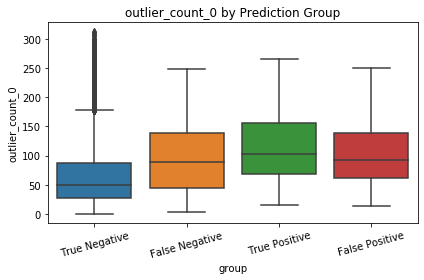

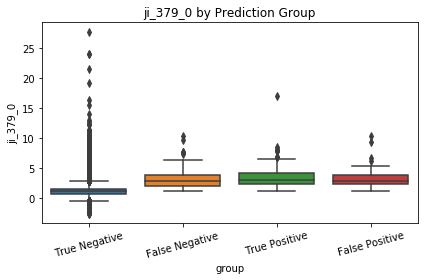

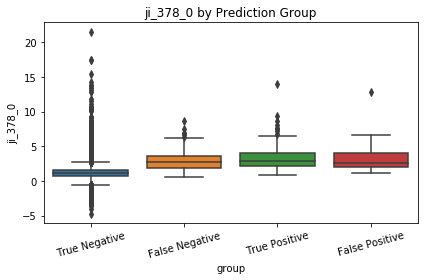

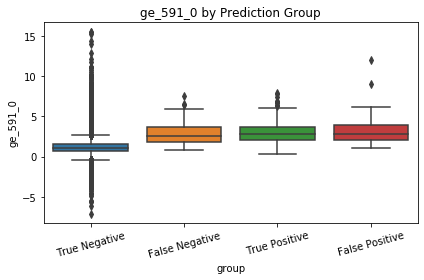

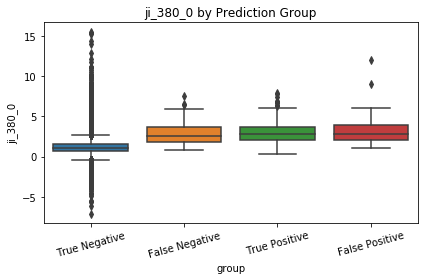

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt


for feature in top_diff_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=analysis_df, x='group', y=feature)
    plt.title(f'{feature} by Prediction Group')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

## Predict as multi output

In [302]:
# Add to training DataFrame
train_df = X_test_trimmed.copy()
train_df['y_true'] = y_test
train_df['y_pred'] = y_pred
X_train_trimmed
# Assign new 4-class labels
def assign_group(row):
    if row['y_true'] == 1 and row['y_pred'] == 1:
        return 'TP'
    elif row['y_true'] == 1 and row['y_pred'] == 0:
        return 'FN'
    elif row['y_true'] == 0 and row['y_pred'] == 1:
        return 'FP'
    else:
        return 'TN'

train_df['error_group'] = train_df.apply(assign_group, axis=1)

In [303]:
from sklearn.preprocessing import LabelEncoder

# Encode TP/TN/FP/FN as 0–3
le = LabelEncoder()
y_multiclass = le.fit_transform(train_df['error_group'])

# Drop label columns for training
X_train_new = train_df.drop(columns=['y_true', 'y_pred', 'error_group'])

# Train a multiclass model
lgb_multi = lgb.LGBMClassifier(objective='multiclass', num_class=4, **Best_Hyperparameters_3)
lgb_multi.fit(X_train_new, y_multiclass)

LGBMClassifier(colsample_bytree=0.545954397887439,
               learning_rate=0.010556170455516557, max_bin=162,
               min_child_samples=31, n_estimators=44226, num_class=4,
               num_leaves=45, objective='multiclass',
               subsample=0.8812363685123362, subsample_freq=2)

In [319]:
train_df['error_group'].value_counts()

TN    39836
TP      174
FN      120
FP       43
Name: error_group, dtype: int64

In [306]:
test_preds_multiclass = lgb_multi.predict(X_train_trimmed)
test_labels = le.inverse_transform(test_preds_multiclass)

# Aggregate to binary prediction
binary_preds = np.where(np.isin(test_labels, ['TP', 'FP']), 1, 0)

In [317]:
results_df = X_train_trimmed.copy()
results_df['y_true'] = y_train
results_df['predicted_group'] = test_labels 

In [318]:
# Cross-tabulation of predicted group vs actual binary label
comparison_table = pd.crosstab(results_df['predicted_group'], results_df['y_true'], 
                               rownames=['Predicted Group'], colnames=['Actual y_train'])
print(comparison_table)

Actual y_train        0    1
Predicted Group             
FN                    1    4
FP                    6    0
TN               159508  903
TP                    0  269


In [315]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_train, binary_preds))
print(classification_report(y_train, binary_preds))

[[159509      6]
 [   907    269]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    159515
           1       0.98      0.23      0.37      1176

    accuracy                           0.99    160691
   macro avg       0.99      0.61      0.68    160691
weighted avg       0.99      0.99      0.99    160691



In [307]:
binary_preds

array([0, 0, 0, ..., 0, 0, 0])

In [305]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## NN models

In [103]:
# Define time steps (how many sequential columns make one sequence)
time_steps = 2  # Adjust this based on how much sequence dependency you want to capture

# Reshape X_train
num_samples = X_train_trimmed.shape[0]
num_features = X_train_trimmed.shape[1] // time_steps  # Assuming all features form a sequence

# Ensure data reshapes correctly
if X_train_trimmed.shape[1] % time_steps != 0:
    print("⚠️ Warning: Features do not perfectly divide into time steps!")

X_train_rnn = X_train_trimmed.values.reshape(num_samples, time_steps, num_features)
X_test_rnn = X_test_trimmed.values.reshape(X_test.shape[0], time_steps, num_features)

In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GRU
import tensorflow.keras.backend as K
from tensorflow.keras.metrics import Recall

def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)  # 👈 Convert labels to float32
        bce = K.binary_crossentropy(y_true, y_pred)
        pt = K.exp(-bce)
        return K.mean(alpha * (1 - pt)**gamma * bce)
    return loss

# Build RNN Model
rnn_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, num_features)),  # First LSTM layer
    Dropout(0.2),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),  # Second LSTM layer
    BatchNormalization(),
    Dropout(0.2),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dense(1, activation='sigmoid')  # Binary classification output (0 or 1)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy', Recall()])

In [598]:
num_features

40

In [105]:
X_train_rnn = np.nan_to_num(X_train_rnn)  
X_test_rnn = np.nan_to_num(X_test_rnn)# Replace NaNs with 0
y_train = np.nan_to_num(y_train) 

In [253]:
# Train the RNN model
rnn_model.fit(X_train_rnn, y_train, epochs=25, batch_size=64, validation_data=(X_test_rnn, y_test))


Epoch 1/25
2511/2511 [==============================] - 17s 7ms/step - loss: 1.3718e-04 - accuracy: 0.9994 - recall: 0.9498 - val_loss: 0.0024 - val_accuracy: 0.9959 - val_recall: 0.5034
Epoch 2/25
2511/2511 [==============================] - 16s 6ms/step - loss: 1.2338e-04 - accuracy: 0.9995 - recall: 0.9592 - val_loss: 0.0026 - val_accuracy: 0.9963 - val_recall: 0.5306
Epoch 3/25
2511/2511 [==============================] - 16s 6ms/step - loss: 1.5060e-04 - accuracy: 0.9994 - recall: 0.9515 - val_loss: 0.0029 - val_accuracy: 0.9960 - val_recall: 0.5000
Epoch 4/25
2511/2511 [==============================] - 17s 7ms/step - loss: 1.7201e-04 - accuracy: 0.9993 - recall: 0.9439 - val_loss: 0.0022 - val_accuracy: 0.9960 - val_recall: 0.5612
Epoch 5/25
2511/2511 [==============================] - 16s 6ms/step - loss: 1.2863e-04 - accuracy: 0.9994 - recall: 0.9541 - val_loss: 0.0024 - val_accuracy: 0.9961 - val_recall: 0.5442
Epoch 6/25
2511/2511 [==============================] - 16s 7ms/s

In [ ]:
#0.0044

In [254]:
# Predict probabilities
y_pred_proba_rnn = rnn_model.predict(X_test_rnn)

In [255]:
y_pred_proba_rnn = np.ravel(y_pred_proba_rnn)
y_pred_proba = np.ravel(y_pred_proba)

In [256]:
# Convert probabilities to binary values (adjust threshold if needed)
y_pred = (y_pred_proba_rnn >= 0.35).astype(int)

In [257]:

# Evaluate Performance
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8018
Recall: 0.5918
F1 Score: 0.6810


In [252]:

# Evaluate Performance
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8364
Recall: 0.6088
F1 Score: 0.7047


In [530]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2319991292097988268
 xla_global_id: -1]

## need to make precision and recall same to get high f1

In [66]:
y_pred_adj = (y_pred_proba >= 0.29).astype(int)

In [67]:
precision = precision_score(y_test, y_pred_adj)
recall = recall_score(y_test, y_pred_adj)
f1 = f1_score(y_test, y_pred_adj)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.809524
Recall: 0.636054
F1 Score: 0.7124


In [13]:
precision = precision_score(y_test, y_pred_adj)
recall = recall_score(y_test, y_pred_adj)
f1 = f1_score(y_test, y_pred_adj)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.760163
Recall: 0.636054
F1 Score: 0.6926


In [59]:
# Count occurrences of 0s and 1s
unique, counts = np.unique(y_pred_adj, return_counts=True)
print("\n🔹 Prediction Counts:")
print(dict(zip(unique, counts)))


🔹 Prediction Counts:
{0: 39914, 1: 259}


In [60]:
39914/259

154.1081081081081

## Run on testing dataset

In [76]:
test_df = pd.read_csv("Testing/merged_cleaned_test.csv")

In [77]:
test_df_ID = test_df["ID"]

In [238]:
test_df.shape

(25108, 674)

In [79]:
test_df = test_df.drop(columns=["ID"], errors="ignore")

In [80]:
test_df.columns = [lazy_pinyin(col)[0] for col in test_df.columns]

In [90]:
test_df.columns = [f"{col}_{i}" if test_df.columns.duplicated()[i] else col for i, col in enumerate(test_df.columns)]

In [94]:
test_df.columns = test_df.columns.astype(str)
# Rename duplicate columns by adding a suffix (_1, _2, etc.)
test_df.columns = pd.Series(test_df.columns).astype(str) + "_" + pd.Series(test_df.columns).groupby(test_df.columns).cumcount().astype(str)


In [83]:
test_df = test_df.fillna(test_df.mean())

In [84]:
# Calculate IQR for all numerical features
Q1 = test_df.quantile(0.25)
Q3 = test_df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers: Any value outside 1.5 * IQR bounds
outlier_mask = (test_df < (Q1 - 1.5 * IQR)) | (test_df > (Q3 + 1.5 * IQR))

# Create an "outlier count" column (number of outlier features per row)
test_df["outlier_count"] = outlier_mask.sum(axis=1)

# Optional: Convert to binary flag (1 if any outlier, 0 if none)
test_df["is_outlier"] = (test_df["outlier_count"] > 0).astype(int)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test_df["outlier_count_scaled"] = scaler.fit_transform(test_df[["outlier_count"]])

### Trimmed result

In [239]:
test_df.columns

Index(['wai_0', 'wai_1_0', 'wai_2_0', 'wai_3_0', 'wai_4_0', 'wai_5_0',
       'wai_6_0', 'wai_7_0', 'wai_8_0', 'wai_9_0',
       ...
       'shang_664_0', 'shang_665_0', 'shang_666_0', 'shang_667_0',
       'shang_668_0', 'shang_669_0', 'shang_670_0', 'outlier_count_0',
       'is_outlier_0', 'outlier_count_scaled_0'],
      dtype='object', length=674)

In [240]:
test_df_trimmed = test_df[top_features]

In [241]:
test_df_trimmed.shape

(25108, 70)

In [242]:
# Predict probabilities for class 1
test_pred_proba_trimmed = bigModel_trimmed.predict_proba(test_df_trimmed)[:, 1]

In [243]:
# Convert to binary predictions (0/1) using threshold 0.5
test_pred_trimmed = (test_pred_proba_trimmed >= 0.005).astype(int)

### RNN

In [127]:
test_df_trimmed_rnn = test_df_trimmed.values.reshape(test_df_trimmed.shape[0], time_steps, num_features)

In [128]:
test_pred_proba_rnn = rnn_model.predict(test_df_trimmed_rnn)

In [496]:
test_pred_proba_rnn = np.ravel(test_pred_proba_rnn)
test_pred_proba = np.ravel(test_pred_proba_trimmed*1000)
test_pred_proba_blend = (test_pred_proba_rnn + test_pred_proba) / 2

In [499]:
test_pred_blend = (test_pred_proba_blend >= 0.3).astype(int)

In [129]:
test_pred_rnn = (test_pred_proba_rnn >= 0.5).astype(int)

In [134]:
test_pred_rnn=np.ravel(test_pred_rnn)

In [135]:
submission_df = pd.DataFrame({"ID": test_df_ID, "Predicted": test_pred_rnn})


In [249]:
submission_df_2 = pd.DataFrame({"ID": test_df_ID, "Predicted": test_pred_trimmed})


In [503]:
submission_df_3 = pd.DataFrame({"ID": test_df_ID, "Predicted": test_pred_blend})


In [504]:
merged_df = submission_df_2.merge(submission_df_3, on='ID', suffixes=('_old', '_new'))

# Find rows where Predicted changed
changed = merged_df[merged_df['Predicted_old'] != merged_df['Predicted_new']]

print(changed)

             ID  Predicted_old  Predicted_new
1644    PU-3394              0              1
3163     PU-395              0              1
3275    PU-4774              0              1
3919    PU-5418              0              1
4005    PU-5504              0              1
4756    PU-6255              0              1
7042    PU-8290              0              1
7250    PU-8498              0              1
8003    PU-9251              0              1
9042   PU-10039              0              1
9451   PU-10448              0              1
10411  PU-11408              0              1
10628  PU-11625              0              1
10726  PU-11723              0              1
11002  PU-11999              0              1
12443  PU-13189              0              1
12904  PU-13650              0              1
13374  PU-14120              0              1
14480  PU-14975              0              1
15181  PU-15676              0              1
16785  PU-17280              0    

In [246]:
# Count occurrences of 0s and 1s
unique, counts = np.unique(test_pred_trimmed, return_counts=True)
print("\n🔹 Prediction Counts:")
print(dict(zip(unique, counts)))


🔹 Prediction Counts:
{0: 24979, 1: 129}


In [251]:
# Count occurrences of 0s and 1s
unique, counts = np.unique(test_pred_trimmed, return_counts=True)
print("\n🔹 Prediction Counts:")
print(dict(zip(unique, counts)))


🔹 Prediction Counts:
{0: 24979, 1: 129}


In [248]:
125/179

0.6983240223463687

In [129]:
df['biao'].value_counts()

0    199394
1      1470
Name: biao, dtype: int64

In [130]:
199394/1470

135.6421768707483

In [80]:
# Count occurrences of 0s and 1s
unique, counts = np.unique(test_pred, return_counts=True)
print("\n🔹 Prediction Counts:")
print(dict(zip(unique, counts)))

,ID,Predicted
760,PU-25108,0


In [250]:
submission_df_2.to_csv("Submission//submission_0322_1.csv",index=False)

In [138]:
submission_pre= pd.read_csv("Submission//submission_0320_3.csv")

In [143]:
to_update = submission_pre[submission_pre['Predicted'] == 1]
submission_df_2.set_index('ID', inplace=True)
to_update.set_index('ID', inplace=True)

# Step 3: Update submission_df_2 with the filtered values
submission_df_2.update(to_update)


In [139]:
submission_pre

,ID,Predicted
0,PU-1,0
1,PU-2,0
2,PU-3,0
3,PU-4,0
4,PU-5,0
...,...,...
25103,PU-24845,0
25104,PU-24846,0
25105,PU-24847,0
25106,PU-24848,0


In [144]:
submission_df_2

,Predicted
ID,
PU-1,0.0
PU-2,0.0
PU-3,0.0
PU-4,0.0
PU-5,0.0
...,...
PU-24845,0.0
PU-24846,0.0
PU-24847,0.0
